In [63]:
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict 

In [64]:
data = pd.read_csv('C:/Users/Dahno Makaplan/Desktop/reviews.csv')

In [65]:
data = data.drop(['Id'], axis=1)

In [66]:
data.shape

(107018, 2)

In [67]:
data.head()

,Review,Label
0,good and interesting,5
1,"This class is very helpful to me. Currently, I...",5
2,like!Prof and TAs are helpful and the discussi...,5
3,Easy to follow and includes a lot basic and im...,5
4,Really nice teacher!I could got the point eazl...,4


In [68]:
X = data['Review']
Y = data['Label']
x_train = data['Review'].values
y_train = data['Label'].values
k=np.unique(y_train)
print ("Unique Classes: ", k)

Unique Classes:  [1 2 3 4 5]


In [69]:
X

0                                      good and interesting
1         This class is very helpful to me. Currently, I...
2         like!Prof and TAs are helpful and the discussi...
3         Easy to follow and includes a lot basic and im...
4         Really nice teacher!I could got the point eazl...
                                ...                        
107013    Trendy topic with talks from expertises in the...
107014    Wonderful! Simple and clear language, good ins...
107015     an interesting and fun course. thanks. dr quincy
107016    very broad perspective, up to date information...
107017    An informative course on the social and financ...
Name: Review, Length: 107018, dtype: object

In [70]:
Y

0         5
1         5
2         5
3         5
4         4
         ..
107013    4
107014    5
107015    5
107016    4
107017    4
Name: Label, Length: 107018, dtype: int64

In [71]:
common = pd.Series(' '.join(data['Review']).split()).value_counts()[:1000]
common = pd.DataFrame(common)
common.reset_index(inplace=True)
common.columns = ['common word', 'count']
display(common.head())

,common word,count
0,the,111119
1,and,89702
2,to,85019
3,a,59847
4,I,58018


In [72]:
rare = pd.Series(' '.join(data['Review']).split()).value_counts()[-1000:]
rare = pd.DataFrame(rare)
rare.reset_index(inplace=True)
rare.columns = ['rare word', 'count']
display(rare.head())

,rare word,count
0,algebra?,1
1,"People'!Sincerely,Shawnee",1
2,OTA's,1
3,designs!,1
4,MUCH!,1


In [73]:
ratings = pd.DataFrame(data.groupby('Label').size()).reset_index()
ratings.columns = ['rating', 'count']
ratings

,rating,count
0,1,2469
1,2,2251
2,3,5071
3,4,18054
4,5,79173


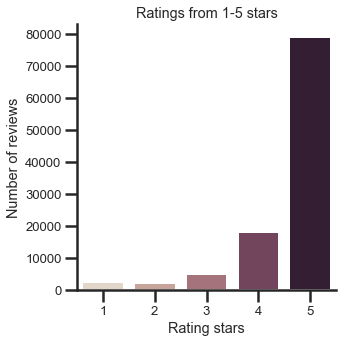

In [74]:
from matplotlib.pyplot import figure
sns.set(context='poster', style='ticks', font_scale=0.6)
sns.catplot(x="rating", y="count", kind='bar', palette="ch:.25", data=ratings)
plt.title('Ratings from 1-5 stars')
plt.xlabel('Rating stars')
plt.ylabel('Number of reviews')
sns.despine()
plt.tight_layout();

In [75]:
def separate_by_class(data):
    separated = dict()
    for i in range(len(data)):
        vector = data[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        
        separated[class_value] = re.sub('[^a-z\s]+', ' ', data[i], flags = re.IGNORECASE)
        separated[class_value] = re.sub('(\s+)', ' ',  separated[class_value])
        separated[class_value] =  separated[class_value].lower()
    return separated

In [76]:
clean_data = separate_by_class(X)

In [100]:
clean_data

{'g': 'it s an amazing and wonderful course that helped me understand a lot of thing in coaching',
 '.': 'very broad perspective up to date information useful links and videos and good lecturers in general thank you for the insights and knowledge ',
 '!': 'wonderful simple and clear language good instructors great stuff highly recommend ',
 'v': 'great course thx yaakov',
 'e': 'great course',
 's': 'great course for all coaches of youth sports',
 'O': 'great information and tools to make your way forward in ltto',
 'n': 'entertaining and informative the course helps you start writing with great tips and suggestions for inspiration',
 ')': 'far too basic in content it s clearly aimed at people with next to no experience at all on writing and publishing however it still is insightful and inspirational as writing for young readers is taught by two established children writers and packed with interviews of other writers from all around the world a nice introduction but just that an introd

In [77]:
def word_counter(sentence_list):
    word_count = defaultdict(lambda:0)
    for sentence in sentence_list:
        for word in sentence:
            word_count[word] += 1
    return word_count

In [78]:
def word_counter(sentence_list):
    word_count = defaultdict(lambda:0)
    for sentence in sentence_list:
        for word in sentence:
            word_count[word] += 1
    return word_count

In [79]:
e=[]
d=[]
t=[]
for i in range(1, len(k)+1):
    star = [x.split() for x in set(X[Y==i])]
    star_total = sum([len(sentence) for sentence in star])
    prior = len(data['Label'][data['Label']==i])/len(data)
    star = word_counter(star)
    t.append(star_total)
    d.append(prior)
    e.append(star)

In [80]:
d

[0.023070885271636546,
 0.021033844773776376,
 0.047384552131417144,
 0.16870059242370442,
 0.7398101253994656]

In [81]:
sum(t)

2631836

In [82]:
t

[120888, 120624, 204775, 512775, 1672774]

In [83]:
maxi=np.max(d)
print('The maximum probability is: ', maxi)
print('The sum of probabilities is: ', np.sum(d))

The maximum probability is:  0.7398101253994656
The sum of probabilities is:  1.0


In [84]:
likelihood = len(e[0])/t[0] + len(e[1])/t[1] + len(e[2])/t[2] + len(e[3])/t[3] + len(e[4])/t[4] 

In [85]:
marginal = (d[0]*t[0]/sum(t)) + (d[1]*t[1]/sum(t)) + (d[2]*t[2]/sum(t)) + (d[3]*t[3]/sum(t)) + (d[4]*t[4]/sum(t))

In [86]:
posterior = likelihood/marginal

In [87]:
print('The posterior is:', posterior)

The posterior is: 0.8606799394561401


In [95]:
star_prior=[]
for i in range(len(k)):
    one =t[i]/sum(t)
    star_prior.append(one)

In [96]:
star_prior

[0.04593295326912467,
 0.045832643067425176,
 0.07780689982202539,
 0.1948354684714397,
 0.6355920353699851]

In [97]:
print('The maximum is: ', np.max(star_prior))

The maximum is:  0.6355920353699851


In [98]:
star1_prior=[]
for i in range(len(k)):
    one =d[i] * t[i]/sum(t)
    star1_prior.append(one)

In [99]:
star1_prior

[0.0010597138950594182,
 0.0009640366998521191,
 0.003686845100800713,
 0.03286885895628187,
 0.4702174233899702]